# Capstone 1 -- Baseline Logististic Regression
## Drug consumption (quantified) Data Set
## Alissa Mezzacappa -- 2/13/2018
To Do:
1. Baseline regression of personality attributes of population that use Cannabis in the past month but never used Heroin.
2. Baseline regression of personality attributes of population that use Heroin ever.

__Import packages. Import data. Perform data wrangling. Run baseline regression for 1. & 2.__

In [1]:
import pandas as pd
import urllib
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [2]:
u=urllib.urlopen('http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29')
text=u.read()

matches=re.findall(r"\d+\.\s\w+", text)
del(matches[0:3])
del(matches[12])
for i in range(0, len(matches)):
    matches[i]=re.sub(r"\d+\.\s","",matches[i])
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"
data = pd.read_csv(url,names=matches) #import data

In [53]:
#Canabis in last month but never heroin -- last_month=['CL4','CL5','CL6'] -- never=['CL0']
cnhX=data[['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']].values
cnhY=((data.Heroin=='CL0')&((data.Cannabis=='CL4')|(data.Cannabis=='CL5')|(data.Cannabis=='CL6'))).values
#1 means never used herion and used canabis in the last month/week/day.
#0 means has used heroin or has not used canabis in the last month/week/day.
#cnhy.value_count(1)
#cnhy.value_count(0)
#X.shape

In [54]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(cnhX,cnhY,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))
#classification report

0.694915254237


This doesn't seem so great.


Let's try different regularization parameters.

In [55]:
clf=LogisticRegression(penalty="l1")
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.692796610169


In [56]:
clf=LogisticRegression(penalty="l2")
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.694915254237


l2 regularization paramater has a slightly greater accuracy of the logistic regression model. Let's use l2 regularization parameter.

Now lets test different hyper parameters to see if we can improve the accuracy.

In [57]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

from sklearn.linear_model import LogisticRegression
max_score = 0

for C in Cs:
        clf = LogisticRegression(penalty="l2",C=C)
        score = cv_score(clf, Xlr, ylr)

        if score > max_score:
            max_score = score
            best_C =C
print max_score, best_C

0.697092950405 0.1


In [70]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

from sklearn.linear_model import LogisticRegression
max_score = 0

for C in Cs:
        clf = LogisticRegression(penalty="l1",C=C)
        score = cv_score(clf, Xlr, ylr)

        if score > max_score:
            max_score = score
            best_C =C
print max_score, best_C

0.844324988096 0.1


In [71]:
clf2=LogisticRegression(penalty="l1", C=0.1)
clf2.fit(Xlr, ylr)
print(accuracy_score(clf2.predict(Xtestlr), ytestlr))

0.872881355932


For modeling population that uses Cannabis in the past month but never used Heroin or used heroin or has not used canabis in the last month/week/day: A hyper parameter of 0.1 with l2 regularization yeilds the most accurate logistic regression prediction.

Now lets perform a baseline regression for the population that uses heroin.

In [9]:
#heroin ever
X=data[['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']].values
yhY=(data.Heroin!="CL0").values

In [10]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X,yhY,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))


0.879237288136


Let's see if we can improve the accuracy by modifying the regularization parameter.

In [66]:
clfb=LogisticRegression(penalty="l1")
clfb.fit(Xlr, ylr)
print(accuracy_score(clfb.predict(Xtestlr), ytestlr))

0.879237288136


In [67]:
clfb=LogisticRegression(penalty="l2")
clfb.fit(Xlr, ylr)
print(accuracy_score(clfb.predict(Xtestlr), ytestlr))

0.879237288136


It would appear the regularization parameter makes no impact in the accuracy of the model.

Let's see if we can improve accuracy by adjusting the hyper parameter.

In [72]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

# your turn
from sklearn.linear_model import LogisticRegression
max_score = 0

for C in Cs:
        clf = LogisticRegression(penalty=='l2', C=C)
        score = cv_score(clf, Xlr, ylr)

        if score > max_score:
            max_score = score
            best_C =C
print max_score, best_C

0.842914066612 1


In [74]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

# your turn
from sklearn.linear_model import LogisticRegression
max_score = 0

for C in Cs:
        clf = LogisticRegression(penalty="l1", C=C)
        score = cv_score(clf, Xlr, ylr)

        if score > max_score:
            max_score = score
            best_C =C
print max_score, best_C

0.844324988096 0.1


Regression model for the population that uses heroin is not affected by hyper parameter tuning or regularization.

To Do:
1) Train Accuracy vs. Test Accuracy -- are these far appart indicating over fitting
2) Accuracy Classification test -- mark up table 

1) Herion

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import urllib
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report


#%%
u=urllib.urlopen('http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29')
text=u.read()
matches=re.findall(r"\d+\.\s\w+", text)
del(matches[0:3])
del(matches[12])
for i in range(0, len(matches)):
    matches[i]=re.sub(r"\d+\.\s","",matches[i])
os.chdir('C:\Users\Alissa\Documents\Springboard\Capstone1\data\DrugConsumption')
data=pd.read_csv("drug_consumption.txt", names=matches)

#%%
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average
#heroin ever
cnhX=data[['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']].values
cnhY=(data.Heroin!="CL0").values
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(cnhX,cnhY,random_state=5)
#Set Logistic regression parameters
clf = LogisticRegression(penalty="l1", C=0.1)
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))
y_predict_test = clf.predict(Xtestlr)
y_predict_training = clf.predict(Xlr)

#%% classification report
print("[Training Classification Report:]")
print(classification_report(ylr, y_predict_training))

print("[Test Classification Report:]")
print(classification_report(ytestlr, y_predict_test))



0.872881355932
[Training Classification Report:]
             precision    recall  f1-score   support

      False       0.85      0.99      0.91      1193
       True       0.33      0.01      0.03       220

avg / total       0.77      0.84      0.78      1413

[Test Classification Report:]
             precision    recall  f1-score   support

      False       0.88      1.00      0.93       412
       True       0.50      0.03      0.06        60

avg / total       0.83      0.87      0.82       472



In [12]:
#Set Logistic regression parameters
clf = LogisticRegression(penalty="l2", C=1)
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))
y_predict_test = clf.predict(Xtestlr)
y_predict_training = clf.predict(Xlr)

#%% classification report
print("[Training Classification Report:]")
print(classification_report(ylr, y_predict_training))

print("[Test Classification Report:]")
print(classification_report(ytestlr, y_predict_test))

0.879237288136
[Training Classification Report:]
             precision    recall  f1-score   support

      False       0.85      0.99      0.91      1193
       True       0.44      0.05      0.09       220

avg / total       0.79      0.84      0.79      1413

[Test Classification Report:]
             precision    recall  f1-score   support

      False       0.88      1.00      0.94       412
       True       0.71      0.08      0.15        60

avg / total       0.86      0.88      0.84       472



2) Heroin

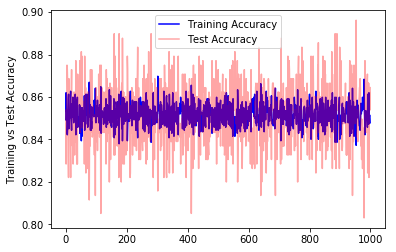

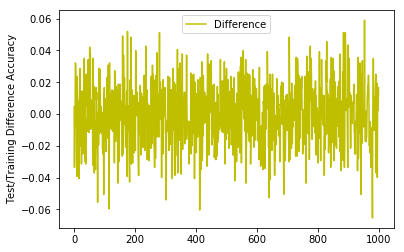

In [13]:
#%% acurracy classification test
# AJS: we try multiple splits and see the effects, with the same proportion 75% train and 25% test

# keep lists for training accuracy, test accuracy, and the difference
# between the latter and the former
training_accuracy = []
test_accuracy = []
accuracy_difference = []

# define number of trials
n_splits = 1000

# define LogisticRegression object
clf = LogisticRegression(penalty="l1", C=0.1)

# loop over multiple trials
for i in range(0, n_splits):
    # do split for this iteration, using shuffle and a different random_state 
    # for every iteration
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(cnhX,cnhY,random_state=i)
    # fit on the training set
    clf.fit(Xlr, ylr)
    
    # predict on training set
    y_predict_training = clf.predict(Xlr)
    
    # predict on test set
    y_predict_test = clf.predict(Xtestlr)
    
    # save training accuracy for this split
    tr_accuracy = accuracy_score(y_predict_training, ylr)
    training_accuracy.append(tr_accuracy)
    
    # save test accuracy for this split
    tst_accuracy = accuracy_score(y_predict_test, ytestlr)
    test_accuracy.append(tst_accuracy)
    
    # save difference
    accuracy_difference.append(tst_accuracy - tr_accuracy)
#end for
#
# plot both curves
# ref: https://matplotlib.org/users/pyplot_tutorial.html
# parameter alpha below is a percentage of transparency
# ref: https://matplotlib.org/users/legend_guide.html
training_plot, = plt.plot(training_accuracy, 'b')
test_plot, = plt.plot(test_accuracy, 'r', alpha = 0.35)
plt.legend([training_plot, test_plot], ['Training Accuracy', 'Test Accuracy'])
plt.ylabel('Training vs Test Accuracy')
plt.show()
# AJS: show accuracy difference plot
diff_plot, = plt.plot(accuracy_difference, 'y')
plt.legend([diff_plot], ['Difference'])
plt.ylabel('Test/Training Difference Accuracy')
plt.show()

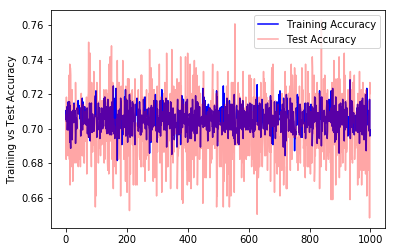

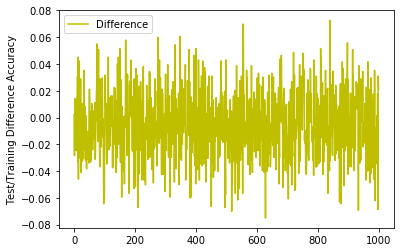

In [80]:
#%% acurracy classification test
# AJS: we try multiple splits and see the effects, with the same proportion 75% train and 25% test

# keep lists for training accuracy, test accuracy, and the difference
# between the latter and the former
training_accuracy = []
test_accuracy = []
accuracy_difference = []

# define number of trials
n_splits = 1000

# define LogisticRegression object
clf = LogisticRegression(penalty="l2", C=1)

# loop over multiple trials
for i in range(0, n_splits):
    # do split for this iteration, using shuffle and a different random_state 
    # for every iteration
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(cnhX,cnhY,random_state=i)
    # fit on the training set
    clf.fit(Xlr, ylr)
    
    # predict on training set
    y_predict_training = clf.predict(Xlr)
    
    # predict on test set
    y_predict_test = clf.predict(Xtestlr)
    
    # save training accuracy for this split
    tr_accuracy = accuracy_score(y_predict_training, ylr)
    training_accuracy.append(tr_accuracy)
    
    # save test accuracy for this split
    tst_accuracy = accuracy_score(y_predict_test, ytestlr)
    test_accuracy.append(tst_accuracy)
    
    # save difference
    accuracy_difference.append(tst_accuracy - tr_accuracy)
#end for
#
# plot both curves
# ref: https://matplotlib.org/users/pyplot_tutorial.html
# parameter alpha below is a percentage of transparency
# ref: https://matplotlib.org/users/legend_guide.html
training_plot, = plt.plot(training_accuracy, 'b')
test_plot, = plt.plot(test_accuracy, 'r', alpha = 0.35)
plt.legend([training_plot, test_plot], ['Training Accuracy', 'Test Accuracy'])
plt.ylabel('Training vs Test Accuracy')
plt.show()
# AJS: show accuracy difference plot
diff_plot, = plt.plot(accuracy_difference, 'y')
plt.legend([diff_plot], ['Difference'])
plt.ylabel('Test/Training Difference Accuracy')
plt.show()